In [2]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
#pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [7]:
gr = pd.read_csv('groceries.csv', sep='delimiter', header=None)
gr.shape

<ipython-input-7-ca02fe2efc5f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gr = pd.read_csv('groceries.csv', sep='delimiter', header=None)


(9835, 1)

In [11]:
#Finding all items present in our data - groceries.csv
#We will have to use the csv package so that we can read each line one by one and update any new grocery item.

import csv
all_items = set()#set of all items
with open('groceries.csv') as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        all_items.update(line)

In [12]:
#Now, we count if a particular item appears in the a particular row and update it in a list format.

counting = list()
with open('groceries.csv') as f:
    reader = csv.reader(f, delimiter = ',')
    for i, line in enumerate(reader):
        row = {item:0 for item in all_items}
        row.update({item:1 for item in line})
        counting.append(row)

In [13]:
#Next, convert the list in to Pandas DataFrame so that we can do pandas operations.

groceries = pd.DataFrame(counting)
groceries.head()
# 0 represents that the item is not present in a particular row/ item order list.

,misc. beverages,hard cheese,white bread,pastry,liqueur,frozen vegetables,cling film/bags,softener,tropical fruit,frozen meals,...,dessert,specialty bar,cream,prosecco,packaged fruit/vegetables,cake bar,berries,UHT-milk,bathroom cleaner,skin care
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
groceries.shape

(9835, 169)

In [16]:
# finding item count is now easy 
# 1) Find total number of items i.e sum of all the sums of row
total_itemcount = sum(groceries.sum())
total_itemcount

43367

In [17]:
# 2) Sum the rows and sort in descending order to get top 20 items
item_sum = groceries.sum().sort_values(ascending=False).reset_index().head(n=20)
item_sum.rename(columns = {item_sum.columns[0] : 'Item_Name',item_sum.columns[1] : 'Item_Count'}, inplace=True)
item_sum

,Item_Name,Item_Count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


In [20]:
# 3) Add the percent so that we know how much it contributes. 

item_sum['Item_percent'] = item_sum['Item_Count']/total_itemcount
item_sum['Tot_percent'] = item_sum.Item_percent.cumsum()
print(item_sum.head(20))

                Item_Name  Item_Count  Item_percent  Tot_percent
0              whole milk        2513      0.057947     0.057947
1        other vegetables        1903      0.043881     0.101829
2              rolls/buns        1809      0.041714     0.143542
3                    soda        1715      0.039546     0.183089
4                  yogurt        1372      0.031637     0.214725
5           bottled water        1087      0.025065     0.239791
6         root vegetables        1072      0.024719     0.264510
7          tropical fruit        1032      0.023797     0.288307
8           shopping bags         969      0.022344     0.310651
9                 sausage         924      0.021307     0.331957
10                 pastry         875      0.020177     0.352134
11           citrus fruit         814      0.018770     0.370904
12           bottled beer         792      0.018263     0.389167
13             newspapers         785      0.018101     0.407268
14            canned beer

Text(0.5, 1.0, 'Item sales distribution')

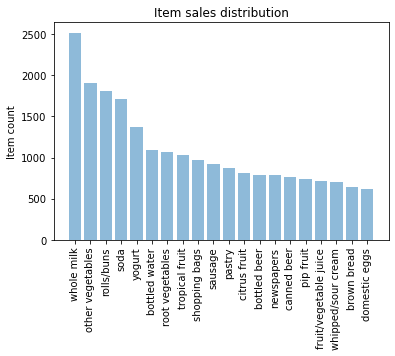

In [23]:
# Plot

obj = (list(item_sum['Item_Name'].head(n=20)))
y_pos = np.arange(len(obj)) # x = The x coordinates of the bars.
performance = list(item_sum['Item_Count'].head(n=20)) # height of the bar

import matplotlib.pyplot as plt
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, obj, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

In [24]:
groceries

,misc. beverages,hard cheese,white bread,pastry,liqueur,frozen vegetables,cling film/bags,softener,tropical fruit,frozen meals,...,dessert,specialty bar,cream,prosecco,packaged fruit/vegetables,cake bar,berries,UHT-milk,bathroom cleaner,skin care
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
groceries.columns

Index(['misc. beverages', 'hard cheese', 'white bread', 'pastry', 'liqueur',
       'frozen vegetables', 'cling film/bags', 'softener', 'tropical fruit',
       'frozen meals',
       ...
       'dessert', 'specialty bar', 'cream', 'prosecco',
       'packaged fruit/vegetables', 'cake bar', 'berries', 'UHT-milk',
       'bathroom cleaner', 'skin care'],
      dtype='object', length=169)

In [34]:
# Get the rules
freq_item = apriori(groceries, min_support = 0.01, use_colnames = True)
freq_item

,support,itemsets
0,0.028368,(misc. beverages)
1,0.024504,(hard cheese)
2,0.042095,(white bread)
3,0.088968,(pastry)
4,0.048094,(frozen vegetables)
...,...,...
328,0.012913,"(yogurt, root vegetables, other vegetables)"
329,0.010473,"(soda, whole milk, yogurt)"
330,0.010269,"(yogurt, citrus fruit, whole milk)"
331,0.014540,"(yogurt, root vegetables, whole milk)"


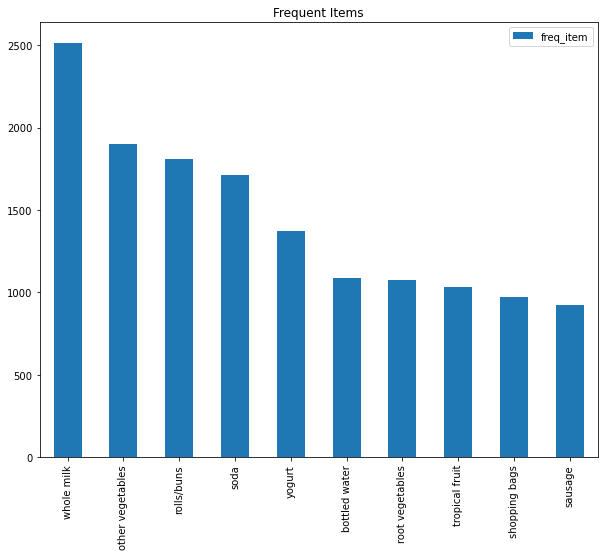

In [36]:
#Quick look at the top 10 items
import matplotlib.pyplot as plt
groceries.sum().to_frame('freq_item').sort_values('freq_item',ascending=False)[:10].plot(kind='bar', figsize=(10,8),
                                                                                  title="Frequent Items")
plt.show()

In [37]:
rules = association_rules(freq_item, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(hard cheese),0.255516,0.024504,0.010066,0.039395,1.607682,0.003805,1.015502
1,(hard cheese),(whole milk),0.024504,0.255516,0.010066,0.410788,1.607682,0.003805,1.263526
2,(white bread),(other vegetables),0.042095,0.193493,0.013726,0.326087,1.685268,0.005581,1.196753
3,(other vegetables),(white bread),0.193493,0.042095,0.013726,0.070941,1.685268,0.005581,1.031049
4,(white bread),(whole milk),0.042095,0.255516,0.017082,0.405797,1.588147,0.006326,1.252912
...,...,...,...,...,...,...,...,...,...
613,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
614,"(whole milk, curd)",(yogurt),0.026131,0.139502,0.010066,0.385214,2.761356,0.006421,1.399671
615,(yogurt),"(whole milk, curd)",0.139502,0.026131,0.010066,0.072157,2.761356,0.006421,1.049606
616,(whole milk),"(yogurt, curd)",0.255516,0.017285,0.010066,0.039395,2.279125,0.005649,1.023017


In [40]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
617,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
612,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
583,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
586,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
510,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
515,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
447,(root vegetables),"(other vegetables, tropical fruit)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
446,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
92,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
93,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366


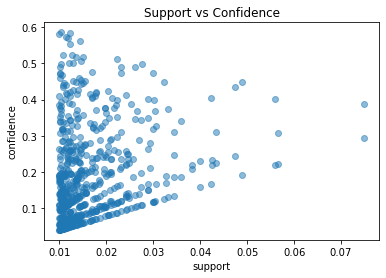

In [41]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

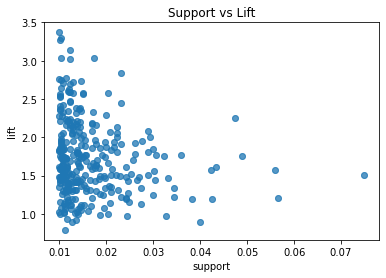

In [42]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

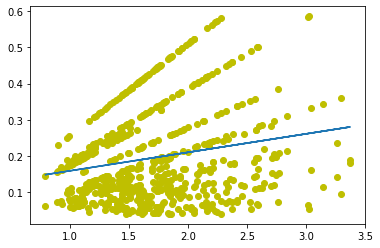

In [43]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [44]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(hard cheese),0.255516,0.024504,0.010066,0.039395,1.607682,0.003805,1.015502
1,(hard cheese),(whole milk),0.024504,0.255516,0.010066,0.410788,1.607682,0.003805,1.263526
2,(white bread),(other vegetables),0.042095,0.193493,0.013726,0.326087,1.685268,0.005581,1.196753
3,(other vegetables),(white bread),0.193493,0.042095,0.013726,0.070941,1.685268,0.005581,1.031049
4,(white bread),(whole milk),0.042095,0.255516,0.017082,0.405797,1.588147,0.006326,1.252912
...,...,...,...,...,...,...,...,...,...
613,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
614,"(whole milk, curd)",(yogurt),0.026131,0.139502,0.010066,0.385214,2.761356,0.006421,1.399671
615,(yogurt),"(whole milk, curd)",0.139502,0.026131,0.010066,0.072157,2.761356,0.006421,1.049606
616,(whole milk),"(yogurt, curd)",0.255516,0.017285,0.010066,0.039395,2.279125,0.005649,1.023017
